In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, KFold, StratifiedKFold, LeaveOneOut
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from scipy.stats import zscore


In [2]:
# Read and inspect the dataset.

data = pd.read_csv("profit_prediction_regression.csv")

print("Dataset Info:")
print(data.info())

print("\nFirst 5 rows:")
print(data.head())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Marketing Spend  50 non-null     float64
 1   Administration   50 non-null     float64
 2   Transport        50 non-null     float64
 3   Area             50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB
None

First 5 rows:
   Marketing Spend  Administration  Transport     Area     Profit
0        114523.61       136897.80  471784.10    Dhaka  192261.83
1        162597.70       151377.59  443898.53      Ctg  191792.06
2        153441.51       101145.55  407934.54  Rangpur  191050.39
3        144372.41       118671.85  383199.62    Dhaka  182901.99
4        142107.34        91391.77  366168.42  Rangpur  166187.94


In [3]:
# Basic EDA 

# Missing values
print("\nMissing Values:")
print(data.isnull().sum())

# Statistical summary (outlier detection)
print("\nStatistical Summary:")
print(data.describe())



Missing Values:
Marketing Spend    0
Administration     0
Transport          0
Area               0
Profit             0
dtype: int64

Statistical Summary:
       Marketing Spend  Administration      Transport         Profit
count        50.000000       50.000000      50.000000      50.000000
mean      73721.615600   121344.639600  211025.097800  112012.639200
std       45902.256482    28017.802755  122290.310726   40306.180338
min           0.000000    51283.140000       0.000000   14681.400000
25%       39936.370000   103730.875000  129300.132500   90138.902500
50%       73051.080000   122699.795000  212716.240000  107978.190000
75%      101602.800000   144842.180000  299469.085000  139765.977500
max      165349.200000   182645.560000  471784.100000  192261.830000


In [4]:
# Missing Value Handing Using SimpleImputer

num_cols = data.select_dtypes(include=np.number).columns

simple_imputer = SimpleImputer(strategy='mean')
data[num_cols] = simple_imputer.fit_transform(data[num_cols])


In [5]:
# Missing Value Handing Using KNNImputer

# Uncomment to use KNN instead
# knn_imputer = KNNImputer(n_neighbors=5)
# data[num_cols] = knn_imputer.fit_transform(data[num_cols])


In [6]:
print("Shape before outlier removal:", data.shape)

#Outlier removal using Z score 

z_scores = np.abs(zscore(data[num_cols]))
non_outliers = (z_scores < 3).all(axis=1)

data = data[non_outliers]

print("Shape after outlier removal:", data.shape)


Shape before outlier removal: (50, 5)
Shape after outlier removal: (50, 5)


In [7]:
# Train and Test Separate

X = data.drop('Profit', axis=1)
y = data['Profit']


In [8]:
# Encoding Categorical Column

X = pd.get_dummies(X, columns=['Area'], drop_first=True)


In [9]:
pd.get_dummies?

Signature:
pd.get_dummies(
    data,
    prefix=None,
    prefix_sep: 'str | Iterable[str] | dict[str, str]' = '_',
    dummy_na: 'bool' = False,
    columns=None,
    sparse: 'bool' = False,
    drop_first: 'bool' = False,
    dtype: 'NpDtype | None' = None,
) -> 'DataFrame'
Docstring:
Convert categorical variable into dummy/indicator variables.

Each variable is converted in as many 0/1 variables as there are different
values. Columns in the output are each named after a value; if the input is
a DataFrame, the name of the original variable is prepended to the value.

Parameters
----------
data : array-like, Series, or DataFrame
    Data of which to get dummy indicators.
prefix : str, list of str, or dict of str, default None
    String to append DataFrame column names.
    Pass a list with length equal to the number of columns
    when calling get_dummies on a DataFrame. Alternatively, `prefix`
    can be a dictionary mapping column names to prefixes.
prefix_sep : str, default '_'
  

In [10]:
# Train Test Split Without CV

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [11]:
# Feature Scaling 

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [12]:
# Linear Regression Without CV 

lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

y_pred_lr = lr.predict(X_test_scaled)

print("\nLinear Regression Performance:")
print("MSE:", mean_squared_error(y_test, y_pred_lr))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lr)))
print("MAE:", mean_absolute_error(y_test, y_pred_lr))
print("R²:", r2_score(y_test, y_pred_lr))




Linear Regression Performance:
MSE: 130390721.14429152
RMSE: 11418.875651494394
MAE: 9232.727124502399
R²: 0.8389824679944402


In [13]:
LinearRegression?


Init signature:
LinearRegression(
    *,
    fit_intercept=True,
    copy_X=True,
    tol=1e-06,
    n_jobs=None,
    positive=False,
)
Docstring:     
Ordinary least squares Linear Regression.

LinearRegression fits a linear model with coefficients w = (w1, ..., wp)
to minimize the residual sum of squares between the observed targets in
the dataset, and the targets predicted by the linear approximation.

Parameters
----------
fit_intercept : bool, default=True
    Whether to calculate the intercept for this model. If set
    to False, no intercept will be used in calculations
    (i.e. data is expected to be centered).

copy_X : bool, default=True
    If True, X will be copied; else, it may be overwritten.

tol : float, default=1e-6
    The precision of the solution (`coef_`) is determined by `tol` which
    specifies a different convergence criterion for the `lsqr` solver.
    `tol` is set as `atol` and `btol` of `scipy.sparse.linalg.lsqr` when
    fitting on sparse training data. Th

In [14]:
lr.coef_

array([31576.53893307,   295.79973447, 10266.09354096,  -281.84724189,
        -556.32083862])

In [15]:
# Compute correlation matrix
correlation_matrix = X.corr()

# Find features with correlation > 0.85
correlated_features = correlation_matrix[correlation_matrix > 0.85]
print(correlated_features)

                 Marketing Spend  Administration  Transport  Area_Dhaka  \
Marketing Spend              1.0             NaN        NaN         NaN   
Administration               NaN             1.0        NaN         NaN   
Transport                    NaN             NaN        1.0         NaN   
Area_Dhaka                   NaN             NaN        NaN         1.0   
Area_Rangpur                 NaN             NaN        NaN         NaN   

                 Area_Rangpur  
Marketing Spend           NaN  
Administration            NaN  
Transport                 NaN  
Area_Dhaka                NaN  
Area_Rangpur              1.0  


In [16]:
Ridge?


Init signature:
Ridge(
    alpha=1.0,
    *,
    fit_intercept=True,
    copy_X=True,
    max_iter=None,
    tol=0.0001,
    solver='auto',
    positive=False,
    random_state=None,
)
Docstring:     
Linear least squares with l2 regularization.

Minimizes the objective function::

||y - Xw||^2_2 + alpha * ||w||^2_2

This model solves a regression model where the loss function is
the linear least squares function and regularization is given by
the l2-norm. Also known as Ridge Regression or Tikhonov regularization.
This estimator has built-in support for multi-variate regression
(i.e., when y is a 2d-array of shape (n_samples, n_targets)).

Read more in the :ref:`User Guide <ridge_regression>`.

Parameters
----------
alpha : {float, ndarray of shape (n_targets,)}, default=1.0
    Constant that multiplies the L2 term, controlling regularization
    strength. `alpha` must be a non-negative float i.e. in `[0, inf)`.

    When `alpha = 0`, the objective is equivalent to ordinary least
    s

In [17]:
# Ridge Without CV

alphas = [0.01, 0.1, 1, 10, 100]

# Initialize lists to store results
ridge_r2, lasso_r2 = [], []
ridge_rmse, lasso_rmse = [], []

#This line is split into two, to prevent a value error
ridge_mae = []
lasso_mae = []

ridge_coefficients, lasso_coefficients = [], []

# Train Ridge and Lasso models for different α values

for alpha in alphas:

    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train_scaled, y_train)
    ridge_pred = ridge.predict(X_test_scaled)
    ridge_r2.append(r2_score(y_test, ridge_pred))
    ridge_rmse.append(np.sqrt(mean_squared_error(y_test, ridge_pred)))
    ridge_mae.append(mean_absolute_error(y_test, ridge_pred))
    ridge_coefficients.append(ridge.coef_)

    # Lasso Without CV

    lasso = Lasso(alpha=alpha)
    lasso.fit(X_train_scaled, y_train)
    lasso_pred = lasso.predict(X_test_scaled)
    lasso_r2.append(r2_score(y_test, lasso_pred))
    lasso_rmse.append(np.sqrt(mean_squared_error(y_test, lasso_pred)))
    lasso_mae.append(mean_absolute_error(y_test, lasso_pred))
    lasso_coefficients.append(lasso.coef_)




In [18]:
print(ridge_r2) # print all of this 

[0.8389256505759493, 0.8384223051039232, 0.8341222512951053, 0.8238948428565808, 0.5330440048391785]


In [19]:
lasso_coefficients

[array([31576.54385001,   295.78601135, 10266.07167139,  -281.82217568,
         -556.29427562]),
 array([31576.58972722,   295.66205033, 10265.87361558,  -281.59654834,
         -556.05507391]),
 array([31577.06279853,   294.41845451, 10263.88223641,  -279.33999984,
         -553.66187232]),
 array([31579.08392725,   282.7377994 , 10246.01917612,  -256.82704427,
         -529.9545693 ]),
 array([31569.92444565,   174.11824513, 10089.61695572,   -32.26573191,
         -295.3166098 ])]

In [20]:
# feature Selection with Lass -> No Need

#selected_features = X.columns[lasso.coef_ != 0]
#print("\nSelected Features by LASSO:")
#print(selected_features)


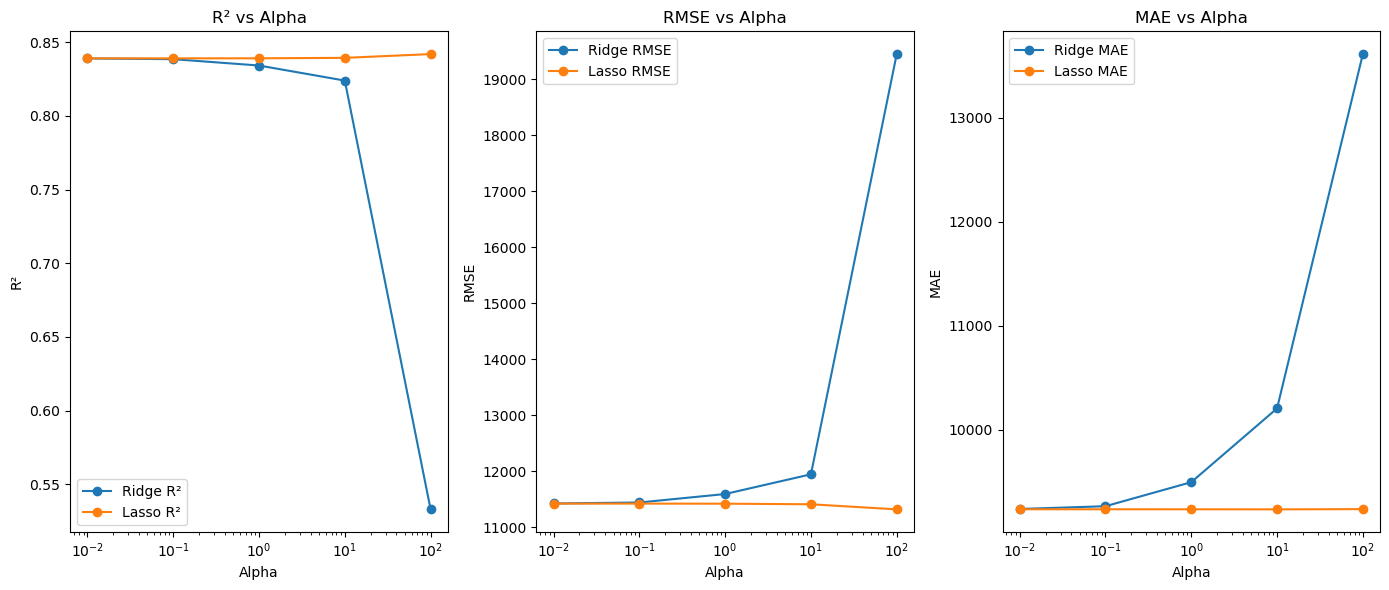

In [21]:
plt.figure(figsize=(14, 6))

# R²
plt.subplot(1, 3, 1)
plt.plot(alphas, ridge_r2, marker='o', label='Ridge R²')
plt.plot(alphas, lasso_r2, marker='o', label='Lasso R²')
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('R²')
plt.title('R² vs Alpha')
plt.legend()

# RMSE
plt.subplot(1, 3, 2)
plt.plot(alphas, ridge_rmse, marker='o', label='Ridge RMSE')
plt.plot(alphas, lasso_rmse, marker='o', label='Lasso RMSE')
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('RMSE')
plt.title('RMSE vs Alpha')
plt.legend()

# MAE
plt.subplot(1, 3, 3)
plt.plot(alphas, ridge_mae, marker='o', label='Ridge MAE')
plt.plot(alphas, lasso_mae, marker='o', label='Lasso MAE')
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('MAE')
plt.title('MAE vs Alpha')
plt.legend()

plt.tight_layout()
plt.show()


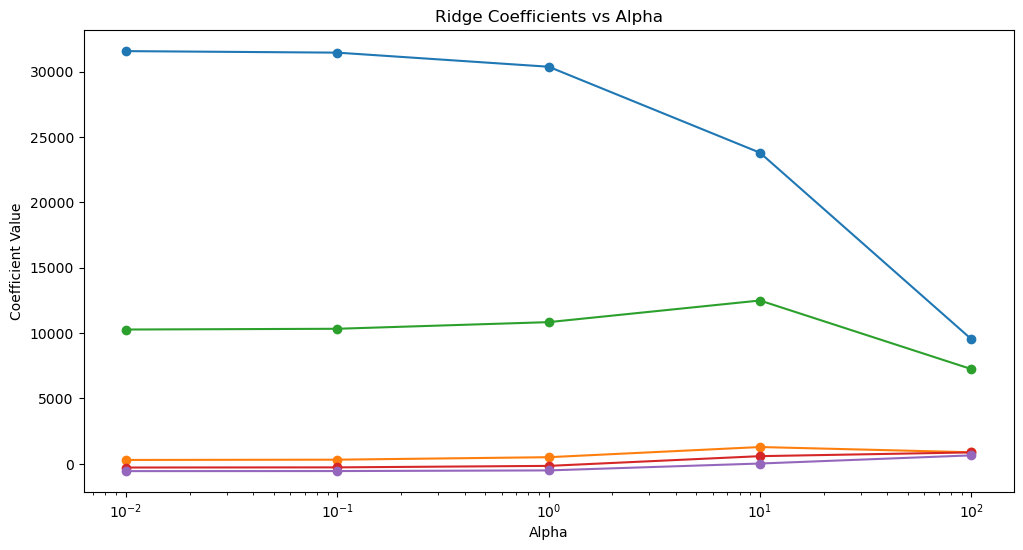

In [22]:
# Co efficient path plot - Ridge

plt.figure(figsize=(12, 6))
plt.plot(alphas, ridge_coefficients, marker='o')
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('Coefficient Value')
plt.title('Ridge Coefficients vs Alpha')
plt.show()
# 

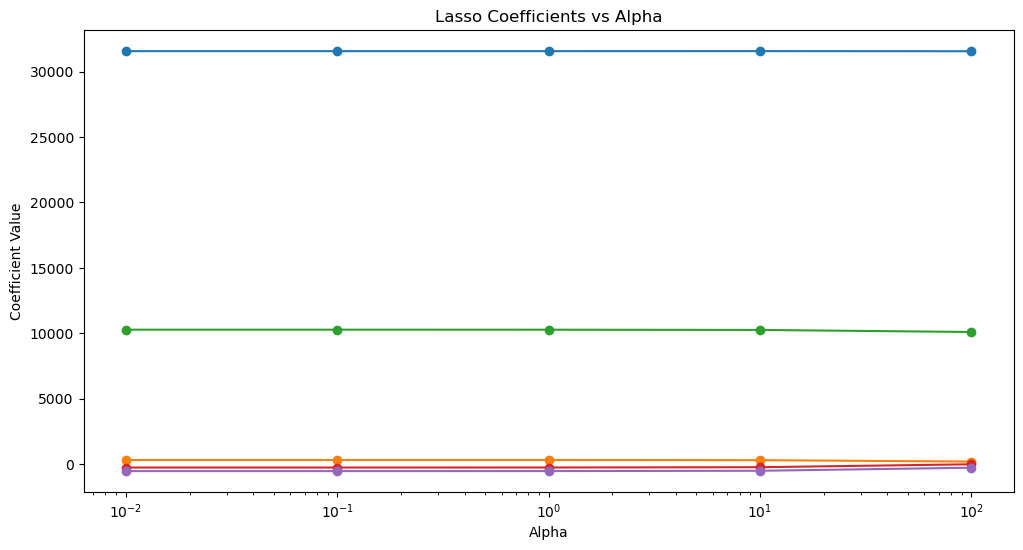

In [23]:
# Co efficient Path Plot - Lasso 

plt.figure(figsize=(12, 6))
plt.plot(alphas,  lasso_coefficients, marker='o')
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('Coefficient Value')
plt.title('Lasso Coefficients vs Alpha')
plt.show()


In [24]:
# Now using K Fold Cross Validation 

kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Store R² scores
r2_lr = []
r2_ridge = []
r2_lasso = []

for train_idx, test_idx in kf.split(X):
    X_train_cv, X_test_cv = X.iloc[train_idx], X.iloc[test_idx]
    y_train_cv, y_test_cv = y.iloc[train_idx], y.iloc[test_idx]

    # Scaling (correct place)
    X_train_cv_scaled = scaler.fit_transform(X_train_cv)
    X_test_cv_scaled = scaler.transform(X_test_cv)

    # 🔹 Linear Regression
    lr.fit(X_train_cv_scaled, y_train_cv)
    y_pred_lr = lr.predict(X_test_cv_scaled)
    r2_lr.append(r2_score(y_test_cv, y_pred_lr))

    # 🔹 Ridge Regression
    ridge.fit(X_train_cv_scaled, y_train_cv)
    y_pred_ridge = ridge.predict(X_test_cv_scaled)
    r2_ridge.append(r2_score(y_test_cv, y_pred_ridge))

    # 🔹 Lasso Regression
    lasso.fit(X_train_cv_scaled, y_train_cv)
    y_pred_lasso = lasso.predict(X_test_cv_scaled)
    r2_lasso.append(r2_score(y_test_cv, y_pred_lasso))




In [25]:
print("\nK-Fold Cross-Validation Accuracy (R² Score):")

print(f"Linear Regression R²: {np.mean(r2_lr)}")
print(f"Ridge Regression R²: {np.mean(r2_ridge)}")
print(f"Lasso Regression R²: {np.mean(r2_lasso)}")



K-Fold Cross-Validation Accuracy (R² Score):
Linear Regression R²: 0.864279567351294
Ridge Regression R²: 0.5146462577099344
Lasso Regression R²: 0.8657543433921457


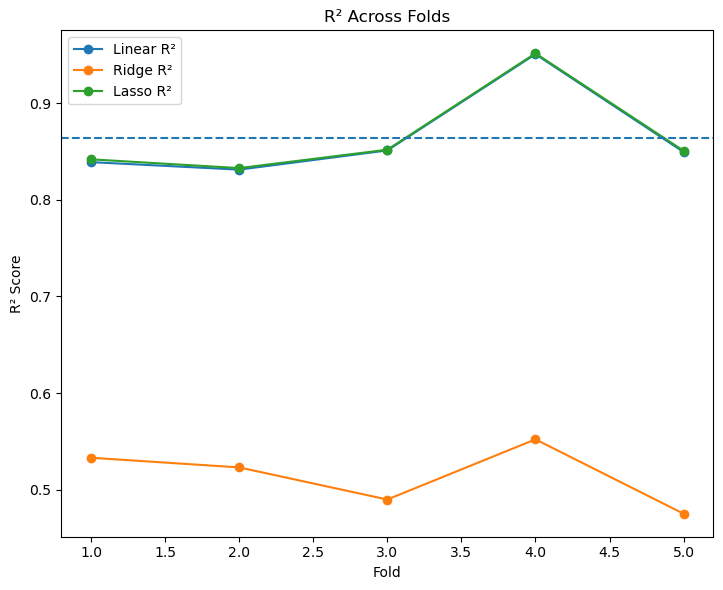

In [26]:
folds = range(1, 6)

plt.figure(figsize=(14, 6))

# R² per fold
plt.subplot(1, 2, 1)
plt.plot(folds, r2_lr, marker='o', label='Linear R²')
plt.plot(folds, r2_ridge, marker='o', label='Ridge R²')
plt.plot(folds, r2_lasso, marker='o', label='Lasso R²')
plt.xlabel('Fold')
plt.ylabel('R² Score')
plt.title('R² Across Folds')
plt.legend()

# Mean R² line
plt.axhline(y=np.mean(r2_lr), linestyle='--')

plt.tight_layout()
plt.show()


In [27]:
# using stratified K Fold

y_binned = pd.qcut(y, q=5, labels=False)

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

r2_lr = []
r2_ridge = []
r2_lasso = []

for train_idx, test_idx in skf.split(X, y_binned):
    X_train_cv, X_test_cv = X.iloc[train_idx], X.iloc[test_idx]
    y_train_cv, y_test_cv = y.iloc[train_idx], y.iloc[test_idx]

    # Scaling (correct)
    X_train_cv_scaled = scaler.fit_transform(X_train_cv)
    X_test_cv_scaled = scaler.transform(X_test_cv)

    # Linear Regression
    lr.fit(X_train_cv_scaled, y_train_cv)
    y_pred_lr = lr.predict(X_test_cv_scaled)
    r2_lr.append(r2_score(y_test_cv, y_pred_lr))

    # Ridge Regression
    ridge.fit(X_train_cv_scaled, y_train_cv)
    y_pred_ridge = ridge.predict(X_test_cv_scaled)
    r2_ridge.append(r2_score(y_test_cv, y_pred_ridge))

    # Lasso Regression
    lasso.fit(X_train_cv_scaled, y_train_cv)
    y_pred_lasso = lasso.predict(X_test_cv_scaled)
    r2_lasso.append(r2_score(y_test_cv, y_pred_lasso))


In [28]:
print("\nStratified K-Fold Cross-Validation Accuracy (R²):")

print(f"Linear Regression R²: {np.mean(r2_lr)}")
print(f"Ridge Regression R²: {np.mean(r2_ridge)}")
print(f"Lasso Regression R²: {np.mean(r2_lasso)}")



Stratified K-Fold Cross-Validation Accuracy (R²):
Linear Regression R²: 0.8478665515368732
Ridge Regression R²: 0.5398452785464908
Lasso Regression R²: 0.8494083539623596


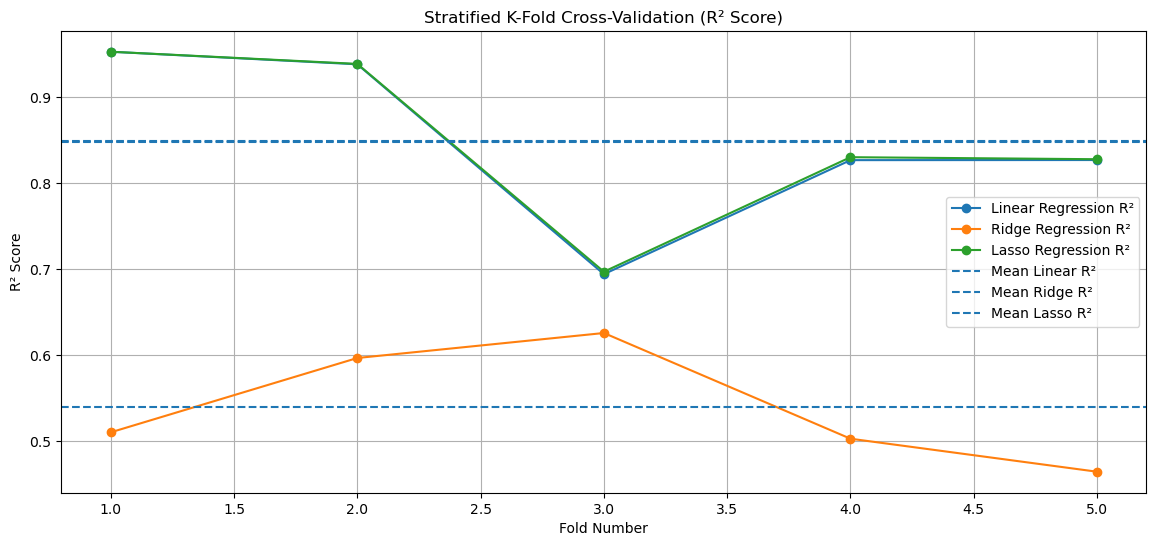

In [29]:
folds = range(1, len(r2_lr) + 1)

plt.figure(figsize=(14, 6))

# Plot R² per fold
plt.plot(folds, r2_lr, marker='o', label='Linear Regression R²')
plt.plot(folds, r2_ridge, marker='o', label='Ridge Regression R²')
plt.plot(folds, r2_lasso, marker='o', label='Lasso Regression R²')

# Mean R² lines
plt.axhline(y=np.mean(r2_lr), linestyle='--', label='Mean Linear R²')
plt.axhline(y=np.mean(r2_ridge), linestyle='--', label='Mean Ridge R²')
plt.axhline(y=np.mean(r2_lasso), linestyle='--', label='Mean Lasso R²')

plt.xlabel("Fold Number")
plt.ylabel("R² Score")
plt.title("Stratified K-Fold Cross-Validation (R² Score)")
plt.legend()
plt.grid(True)

plt.show()